## Import the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#path="/content/drive/MyDrive/ML/final project/Copy of creditcard.csv"
path="/content/drive/MyDrive/Colab Notebooks/ML/creditcard.csv"

Mounted at /content/drive


## Impoort the Libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,roc_curve,precision_recall_fscore_support , log_loss
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN , RandomOverSampler
from collections import Counter




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Visualise and Prepare the Data


### Read the Data and Drop Time and Amount Features

In [ ]:
df = pd.read_csv(path) 
data = df.copy()
df=df.drop("Time",1)
df=df.drop("Amount",1)
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Understand the Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

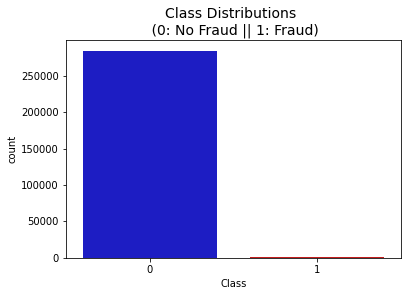

In [ ]:
#plot the "Y" column 
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)


In [ ]:
#check if we have a missing values in our data 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')


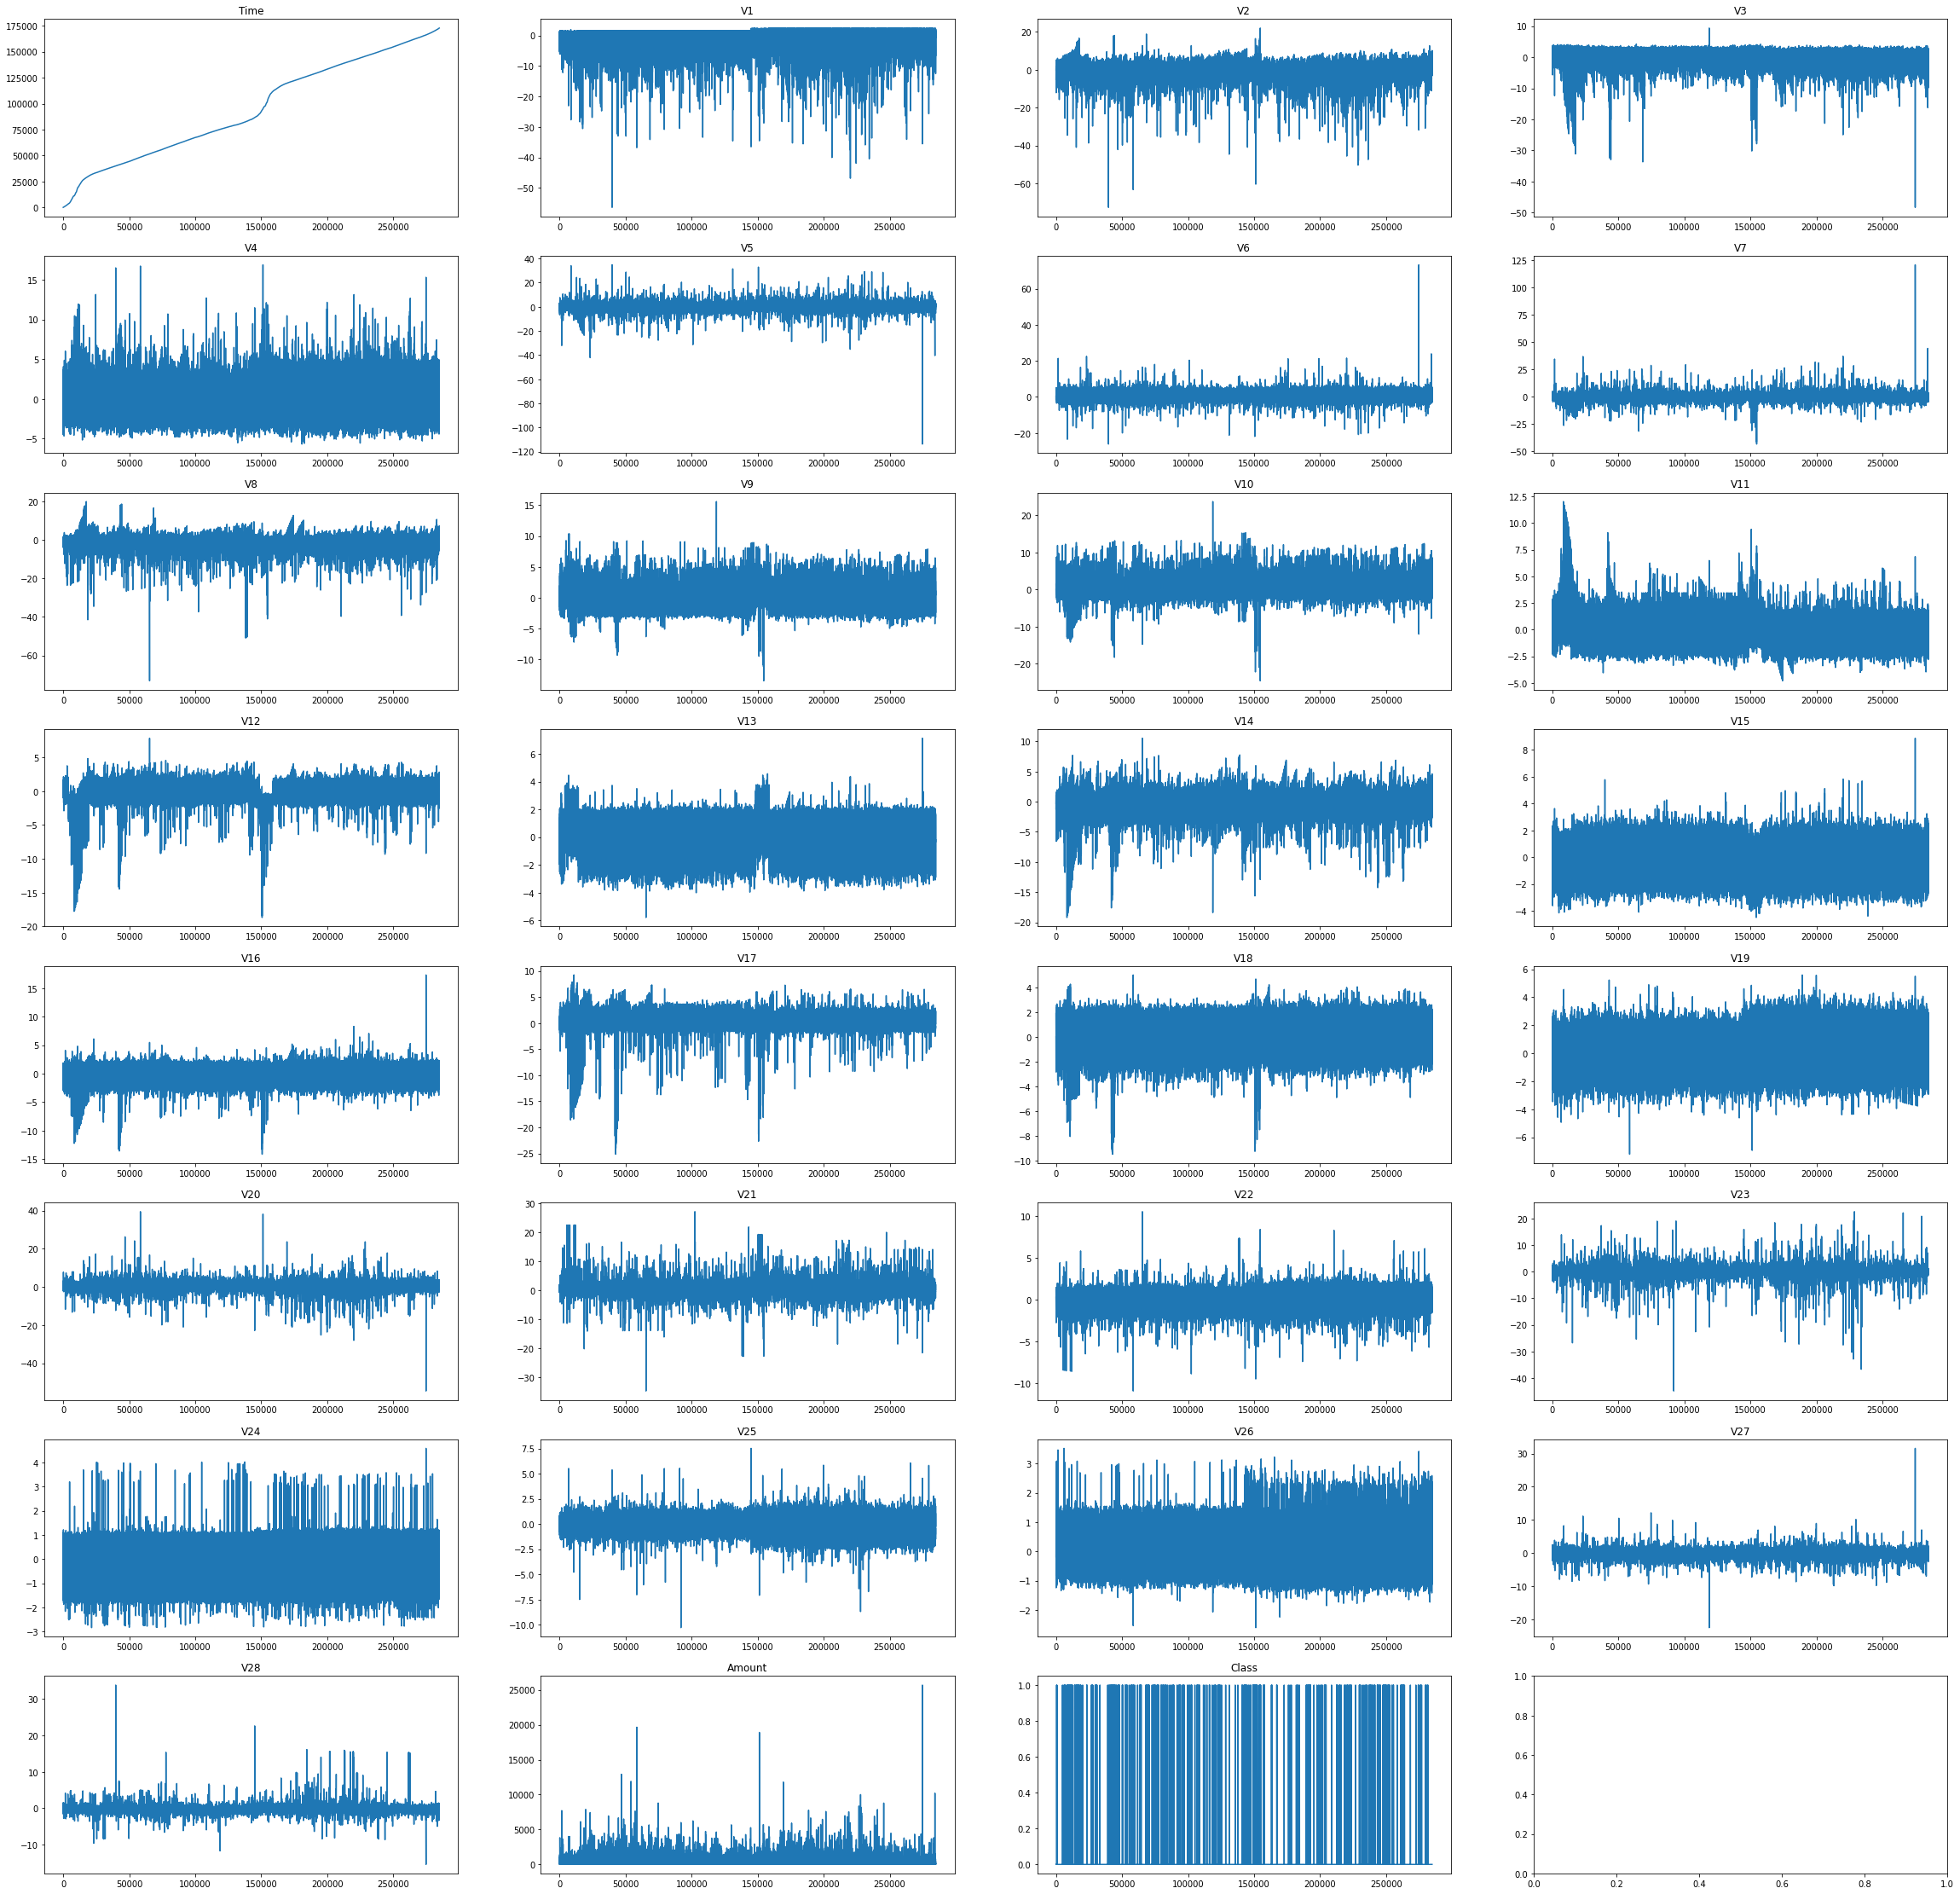

In [ ]:
#plot the Features
fig,axes = plt.subplots( 8 , 4 , figsize = (40,40))
print(df.columns)
counter = 0
for i in range(8):
  for j in range(4):
    if i == 7 and j == 3:
      break
    axes[i][j].plot(data[data.columns[counter]])
    axes[i, j].set_title(data.columns[counter]) #[ ]
    counter+=1 

### prepare the X and Y Matrixes

In [ ]:
#prepare and X array 
x = df.copy()
x = x.drop('Class', 1)
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


### Scale the X Matrix

In [ ]:

scaler = preprocessing.StandardScaler() #identify  the scaler 
d = scaler.fit_transform(x.values) #normalize x matrix
x = pd.DataFrame(d)
x.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,-0.540407,-0.618296,-0.996099,-0.324610,1.604014,-0.536833,0.244863,0.030770,0.496282,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,1.580003,1.066089,0.491418,-0.149982,0.694360,0.529434,-0.135170,-0.218763,-0.179086,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,0.611830,0.066137,0.720700,-0.173114,2.562906,-3.298235,1.306868,-0.144790,-2.778561,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,-0.221892,0.178371,0.510169,-0.300360,-0.689837,-1.209296,-0.805445,2.345305,-1.514205,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,-0.806147,0.538627,1.352244,-1.168034,0.191323,-0.515205,-0.279081,-0.045569,0.987037,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816


### Extract the Y column from the Data

In [ ]:
#take the Y coloum ( Class Coloum in the data)
y = df.copy()
y.drop(y.columns.difference(['Class']), 1, inplace=True)
y.head()


,Class
0,0
1,0
2,0
3,0
4,0


### Split the data to train and test 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train = X_train.values
X_test = X_test.values 
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

## What we will do 
#### 1 Classification Models

**Logistic Regression**

**svm**

**Random Forest**

#### 2 Class Imbalance Solutions


**Over Sampling**

**SMOTE**


#### 3 Metrics

**Accuracy Score**

**Confusion Matrix**

**Precision Score**

**Recall Score**

**ROC_AUC**

**F1 Score**

## Function to help us visulise the Accuracies and the Confustion Matrix

In [ ]:
names_lst=[]
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

In [ ]:
def confustion_func(y_test , y_pred ,X_test,model,name):       
  names_lst.append(name)



  Accuracy_test = metrics.accuracy_score(y_test, y_pred)
  accuracy_test_lst.append(Accuracy_test)



  Aucs_test = metrics.roc_auc_score(y_test , y_pred)
  aucs_test_lst.append(Aucs_test)



  PrecisionScore_test = metrics.precision_score(y_test , y_pred)
  precision_test_lst.append(PrecisionScore_test)


  RecallScore_test = metrics.recall_score(y_test , y_pred)
  recall_test_lst.append(RecallScore_test)


  F1Score_test = metrics.f1_score(y_test , y_pred)
  f1_test_lst.append(F1Score_test)


  # draw confusion matrix
  cnf_matrix = metrics.confusion_matrix(y_test , y_pred)

  plt.clf()
  plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title(name)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cnf_matrix[i][j]))
  plt.show()
  print("\n")
  result=metrics.plot_roc_curve(model, X_test, y_test)
  AUC=result.roc_auc
  print("\n")
  print("Model Name :", name)


  print('Test Accuracy :{}'.format(Accuracy_test))


  print('Test AUC : {}'.format(Aucs_test))


  print('Test Precision : {}'.format(PrecisionScore_test))


  print('Test Recall : {}'.format(RecallScore_test))


  print('Test F1 : {}'.format(F1Score_test))

  print("\n")
  print("\n")
  print("\n")
  print("\n")


In [ ]:
def plot_learning_cuve(model ,X_train  , y_train):
    train_loss, test_loss = [], []
    for m in range(20000,len(X_train),40000):
        
        model.fit(X_train[:m,:], y_train[:m])
        y_train_prob_pred = model.predict_proba(X_train[:m,:])
        train_loss.append(log_loss(y_train[:m], y_train_prob_pred))
        
        y_test_prob_pred = model.predict_proba(X_test)
        test_loss.append(log_loss(y_test, y_test_prob_pred))
        
    plt.figure(figsize = (15,8))
    plt.plot(train_loss, 'r-+', label = 'Training Loss')
    plt.plot(test_loss, 'b-', label = 'Test Loss')
    plt.xlabel('Number Of Batches')
    plt.ylabel('Log-Loss')
    plt.legend(loc = 'best')



    plt.show()



### Function that return best Parameters for the model

In [ ]:
def Hyperparameters( model  ,params, x , y ):  
  grid_log_reg = GridSearchCV(model, params,n_jobs=2)
  grid_log_reg.fit(x, y)
  return (grid_log_reg.best_params_)

##THE MODELS

### Logistic Regression With The Imbalanced Data

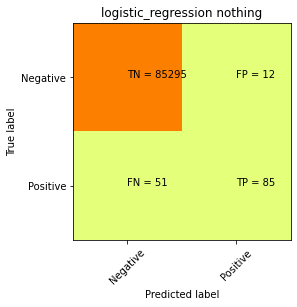





Model Name : logistic_regression nothing
Test Accuracy :0.9992626663389628
Test AUC : 0.812429665795304
Test Precision : 0.8762886597938144
Test Recall : 0.625
Test F1 : 0.7296137339055795








Train AUC Score 0.8075114082704146
Test AUC Score 0.812429665795304


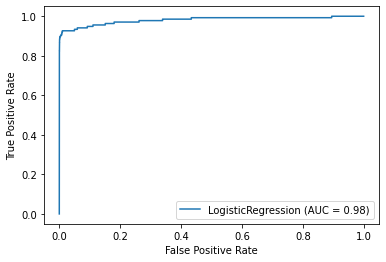

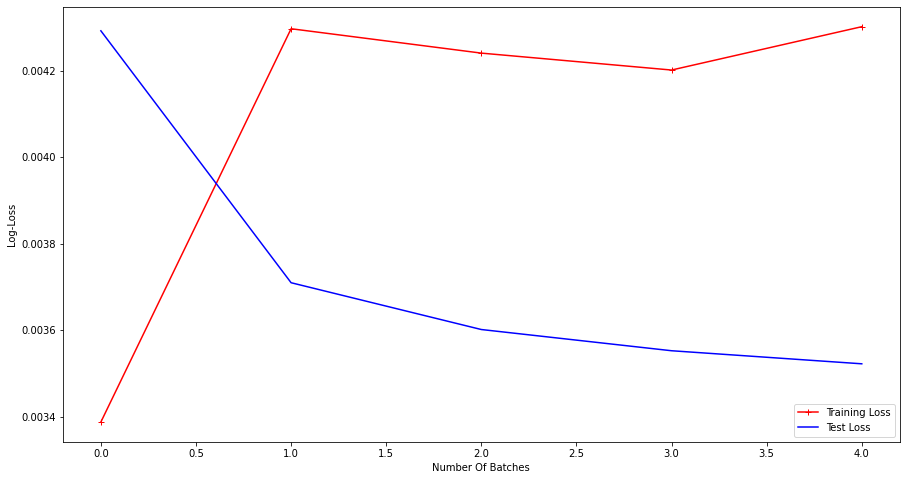

In [ ]:
log_reg_params = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  }
logistic_regression = LogisticRegression( random_state=0).fit(X_train, y_train)
y_train_pred = logistic_regression.predict(X_train)
y_test_pred = logistic_regression.predict(X_test)
confustion_func(y_test , y_test_pred,X_test,logistic_regression,"logistic_regression nothing")


Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
print(f"Train AUC Score {Aucs_train}")
print(f"Test AUC Score {Aucs_test}")
plot_learning_cuve(logistic_regression, X_train, y_train)

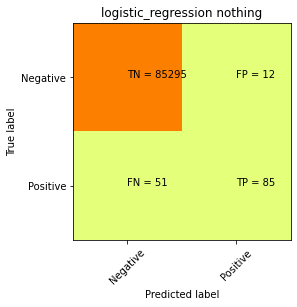





Model Name : logistic_regression nothing
Test Accuracy :0.9992626663389628
Test AUC : 0.812429665795304
Test Precision : 0.8762886597938144
Test Recall : 0.625
Test F1 : 0.7296137339055795








C 10
Train AUC Score 0.808915902652437
Test AUC Score 0.812429665795304


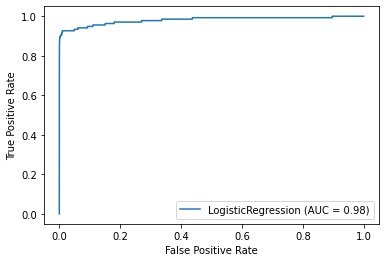

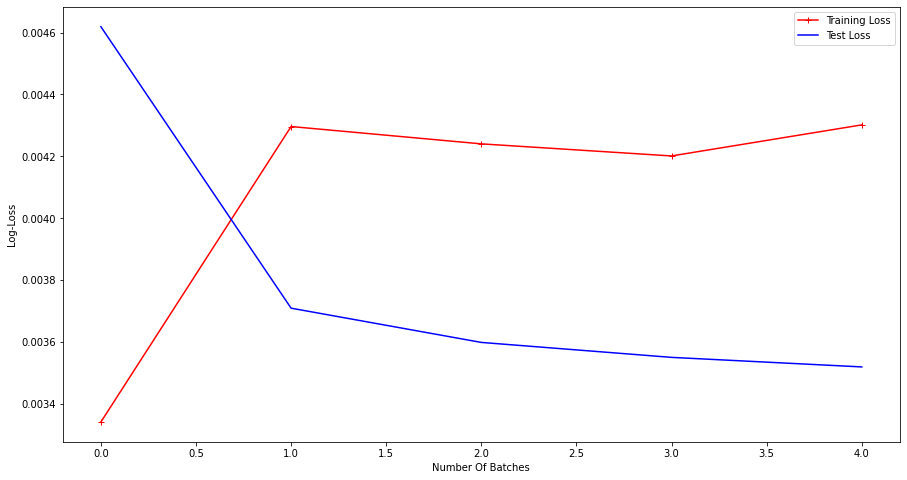

In [ ]:
log_reg_params = { 'C': [0.001, 0.01, 0.1,  10, 100, 1000]  }
a=Hyperparameters(LogisticRegression(),log_reg_params,X_train,y_train)
logistic_regression = LogisticRegression(C=a["C"],  random_state=0).fit(X_train, y_train)
y_train_pred = logistic_regression.predict(X_train)
y_test_pred = logistic_regression.predict(X_test)
confustion_func(y_test , y_test_pred,X_test,logistic_regression,"logistic_regression nothing")


Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
print("C",a["C"])
print(f"Train AUC Score {Aucs_train}")
print(f"Test AUC Score {Aucs_test}")
plot_learning_cuve(logistic_regression, X_train, y_train)

### Prepare the Data for Over Samplling

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 199008, 1: 356})
Resampled dataset shape Counter({0: 199008, 1: 199008})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Prepare the Data for Smote

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 199008, 1: 356})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 199008, 1: 199008})


### Logistic Regressoin OverSamplling 

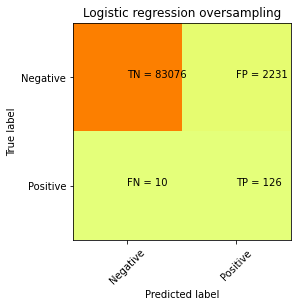





Model Name : Logistic regression oversampling
Test Accuracy :0.973771988343106
Test AUC : 0.9501589932279195
Test Precision : 0.05345778532032244
Test Recall : 0.9264705882352942
Test F1 : 0.10108303249097474








Train AUC Score 0.9462986412606528
Test AUC Score 0.9501589932279195


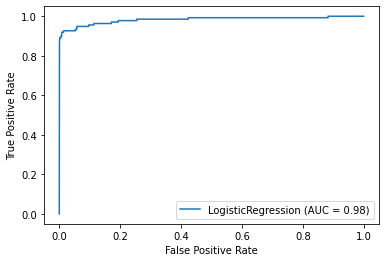

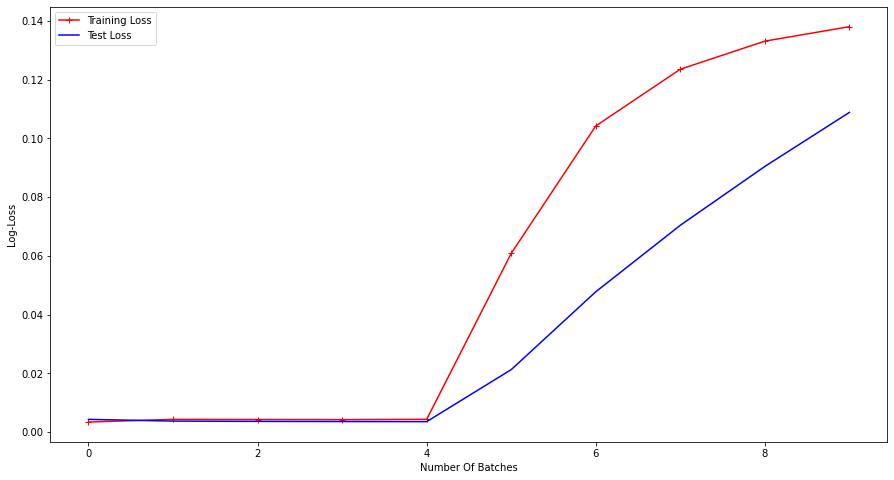

In [ ]:
log_reg_params = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  }
logistic_regression = LogisticRegression( random_state=0).fit(X_train_ros, y_train_ros)
y_train_pred = logistic_regression.predict(X_train_ros)
y_test_pred = logistic_regression.predict(X_test)
confustion_func(y_test , y_test_pred,X_test,logistic_regression,"Logistic regression oversampling")


Aucs_train = metrics.roc_auc_score(y_train_ros, y_train_pred)
Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
print(f"Train AUC Score {Aucs_train}")
print(f"Test AUC Score {Aucs_test}")
plot_learning_cuve(logistic_regression, X_train_ros, y_train_ros)

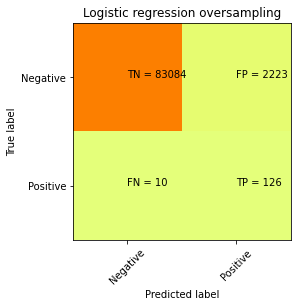





Model Name : Logistic regression oversampling
Test Accuracy :0.9738656180143488
Test AUC : 0.9502058826977168
Test Precision : 0.05363984674329502
Test Recall : 0.9264705882352942
Test F1 : 0.10140845070422536








C 0.1
Train AUC Score 0.9463363281878115
Test AUC Score 0.9502058826977168


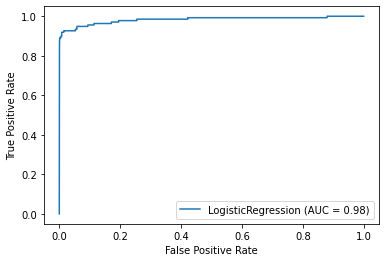

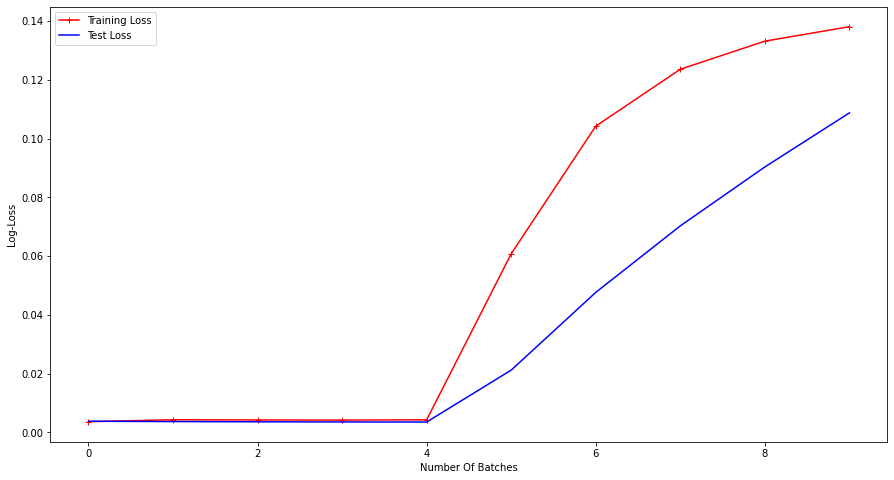

In [ ]:
log_reg_params = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  }
a=Hyperparameters(LogisticRegression(),log_reg_params,X_train_ros,y_train_ros)
logistic_regression = LogisticRegression(C=a["C"],  random_state=0).fit(X_train_ros, y_train_ros)
y_train_pred = logistic_regression.predict(X_train_ros)
y_test_pred = logistic_regression.predict(X_test)
confustion_func(y_test , y_test_pred,X_test,logistic_regression,"Logistic regression oversampling")


Aucs_train = metrics.roc_auc_score(y_train_ros, y_train_pred)
Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
print("C",a["C"])
print(f"Train AUC Score {Aucs_train}")
0.10108303249097474
print(f"Test AUC Score {Aucs_test}")
plot_learning_cuve(logistic_regression, X_train_ros, y_train_ros)

### Logistic Regression on Smote

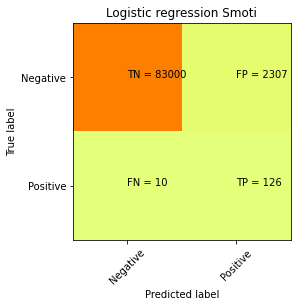





Model Name : Logistic regression Smoti
Test Accuracy :0.9728825064662991
Test AUC : 0.9497135432648449
Test Precision : 0.051787916152897656
Test Recall : 0.9264705882352942
Test F1 : 0.09809264305177112








C 10
Train AUC Score 0.9443464584338318
Test AUC Score 0.9497135432648449


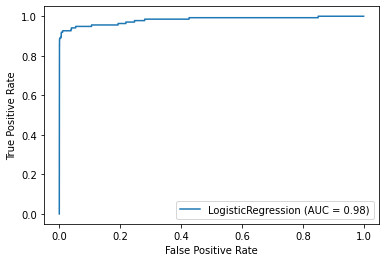

In [ ]:

log_reg_params = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  }
a=Hyperparameters(LogisticRegression(max_iter=1000),log_reg_params,X_train_smote, y_train_smote)
logistic_regression = LogisticRegression(C=a["C"],  random_state=42).fit(X_train_smote, y_train_smote)
y_train_pred = logistic_regression.predict(X_train_smote)
y_test_pred = logistic_regression.predict(X_test)
confustion_func(y_test , y_test_pred,X_test,logistic_regression,"Logistic regression Smoti")

Aucs_train = metrics.roc_auc_score(y_train_smote, y_train_pred)
Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
print("C",a["C"])

print(f"Train AUC Score {Aucs_train}")
print(f"Test AUC Score {Aucs_test}")

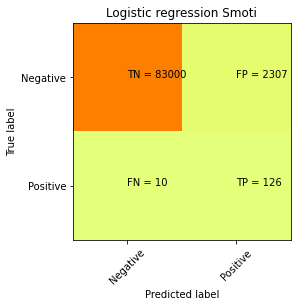





Model Name : Logistic regression Smoti
Test Accuracy :0.9728825064662991
Test AUC : 0.9497135432648449
Test Precision : 0.051787916152897656
Test Recall : 0.9264705882352942
Test F1 : 0.09809264305177112








Train AUC Score 0.9443464584338318
Test AUC Score 0.9497135432648449


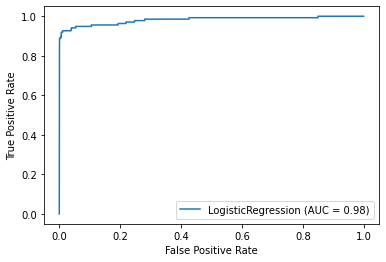

In [ ]:

log_reg_params = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  }
logistic_regression = LogisticRegression(  random_state=0).fit(X_train_smote, y_train_smote)
y_train_pred = logistic_regression.predict(X_train_smote)
y_test_pred = logistic_regression.predict(X_test)
confustion_func(y_test , y_test_pred,X_test,logistic_regression,"Logistic regression Smoti")

Aucs_train = metrics.roc_auc_score(y_train_smote, y_train_pred)
Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)


print(f"Train AUC Score {Aucs_train}")
print(f"Test AUC Score {Aucs_test}")

###  SVM 

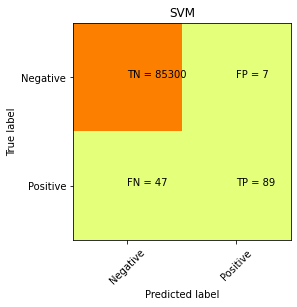





Model Name : SVM
Test Accuracy :0.9993679997191109
Test AUC : 0.8271648540668683
Test Precision : 0.9270833333333334
Test Recall : 0.6544117647058824
Test F1 : 0.7672413793103448








Train AUC Score 0.904481819713419
Test AUC Score 0.8271648540668683


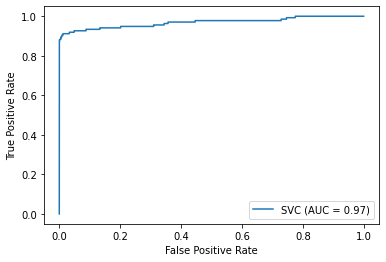

In [ ]:
svm_model = svm.SVC().fit(X_train, y_train)
y_test_pred = svm_model.predict(X_test)
y_train_pred = svm_model.predict(X_train)
confustion_func(y_test , y_test_pred,X_test,svm_model,"SVM")

       

Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)

print(f"Train AUC Score {Aucs_train}")
print(f"Test AUC Score {Aucs_test}")

### SVM OverSampling

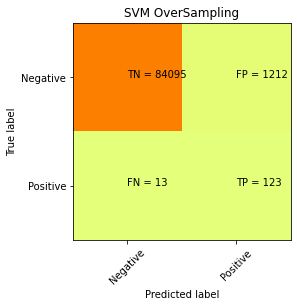





Model Name : SVM OverSampling
Test Accuracy :0.9856629565909437
Test AUC : 0.9451021276786471
Test Precision : 0.09213483146067415
Test Recall : 0.9044117647058824
Test F1 : 0.16723317471108087








Train AUC Score 0.9776139652677278
Test AUC Score 0.9451021276786471


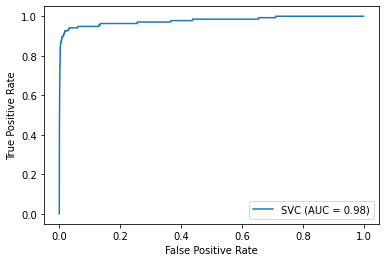

In [ ]:
svm_model = svm.SVC().fit(X_train_ros, y_train_ros)
y_test_pred = svm_model.predict(X_test)
y_train_pred = svm_model.predict(X_train_ros)
confustion_func(y_test , y_test_pred,X_test,svm_model,"SVM OverSampling")

       

Aucs_train = metrics.roc_auc_score(y_train_ros, y_train_pred)
Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)

print(f"Train AUC Score {Aucs_train}")
print(f"Test AUC Score {Aucs_test}")

### Random Forest model

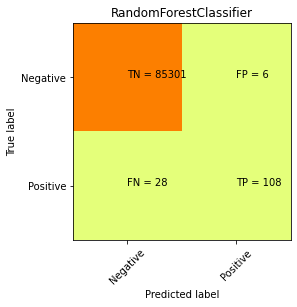





Model Name : RandomForestClassifier
Test Accuracy :0.999602073897218
Test AUC : 0.8970236564270637
Test Precision : 0.9473684210526315
Test Recall : 0.7941176470588235
Test F1 : 0.864








Train AUC Score 1.0
Test AUC Score 0.8970236564270637


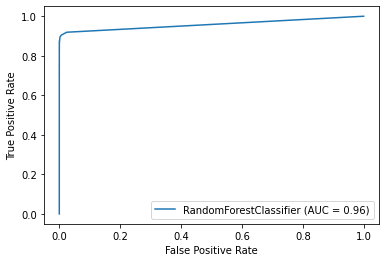

In [ ]:
rf = RandomForestClassifier( random_state = 42 )
rf.fit(X_train, y_train);
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
confustion_func(y_test , y_test_pred ,X_test,rf,"RandomForestClassifier")

Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)

print(f"Train AUC Score {Aucs_train}")
print(f"Test AUC Score {Aucs_test}")

### Plot the Loss for The Random Forest model

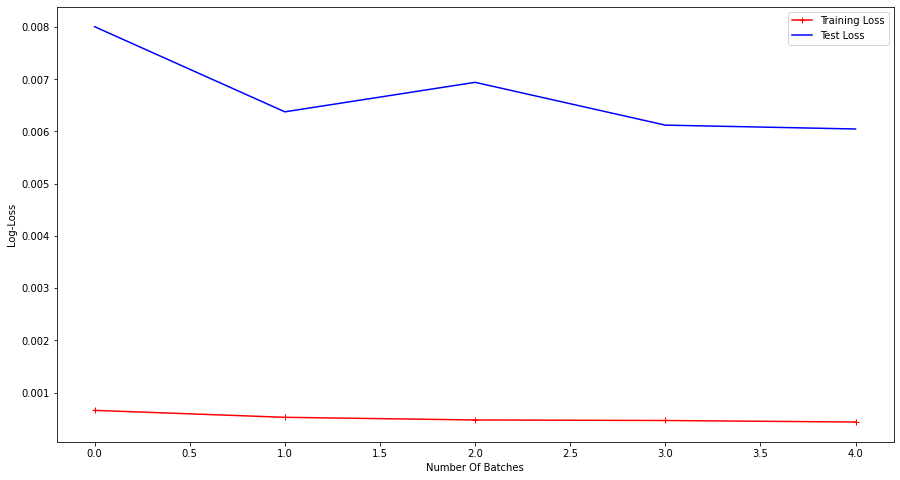

In [ ]:
plot_learning_cuve(rf ,X_train  , y_train)

### Random Forest OverSampling

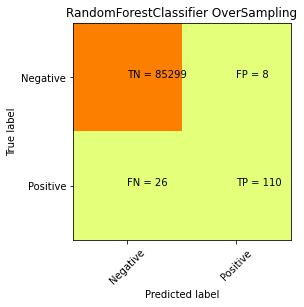





Model Name : RandomForestClassifier OverSampling
Test Accuracy :0.999602073897218
Test AUC : 0.9043648752360851
Test Precision : 0.9322033898305084
Test Recall : 0.8088235294117647
Test F1 : 0.8661417322834646








Train AUC Score 1.0
Test AUC Score 0.9043648752360851


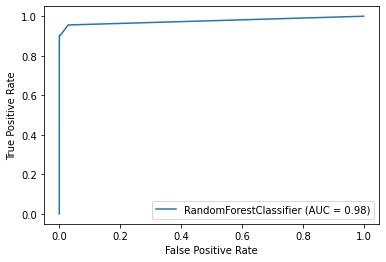

In [ ]:
rf = RandomForestClassifier( random_state = 42 )
rf.fit(X_train_ros, y_train_ros);
y_train_pred = rf.predict(X_train_ros)
y_test_pred = rf.predict(X_test)
confustion_func(y_test , y_test_pred ,X_test,rf,"RandomForestClassifier OverSampling")

Aucs_train = metrics.roc_auc_score(y_train_ros, y_train_pred)
Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)

print(f"Train AUC Score {Aucs_train}")
print(f"Test AUC Score {Aucs_test}")

### Plot the Loss for The Random Forest model With the OverSampling Data

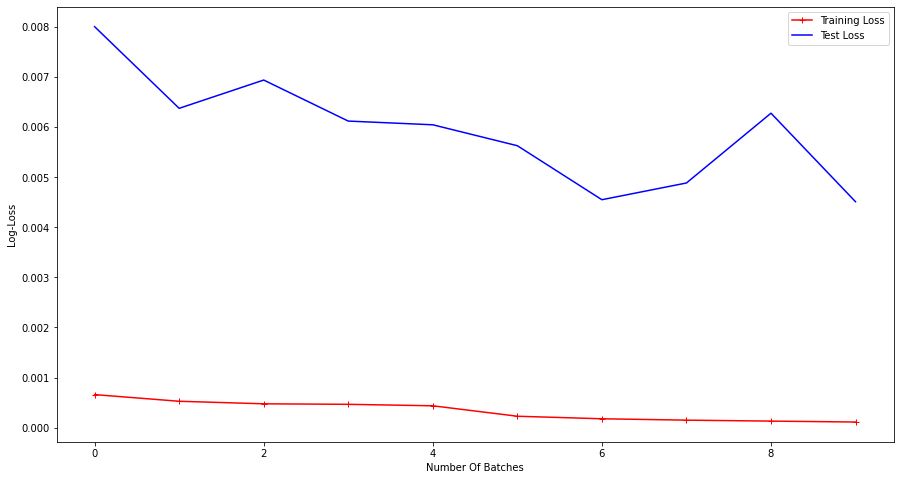

In [ ]:
plot_learning_cuve(rf ,X_train_ros  , y_train_ros)

### Random Forest model Smote

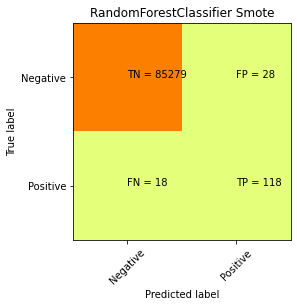





Model Name : RandomForestClassifier Smote
Test Accuracy :0.9994616293903538
Test AUC : 0.9336594162674741
Test Precision : 0.8082191780821918
Test Recall : 0.8676470588235294
Test F1 : 0.8368794326241135








Train AUC Score 1.0
Test AUC Score 0.9336594162674741


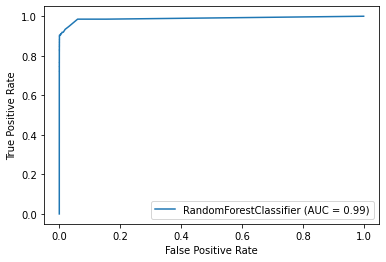

In [ ]:
rf = RandomForestClassifier( random_state = 42 )
rf.fit(X_train_smote, y_train_smote);
y_train_pred = rf.predict(X_train_ros)
y_test_pred = rf.predict(X_test)
confustion_func(y_test , y_test_pred ,X_test,rf,"RandomForestClassifier Smote")

Aucs_train = metrics.roc_auc_score(y_train_smote, y_train_pred)
Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)

print(f"Train AUC Score {Aucs_train}")
print(f"Test AUC Score {Aucs_test}")

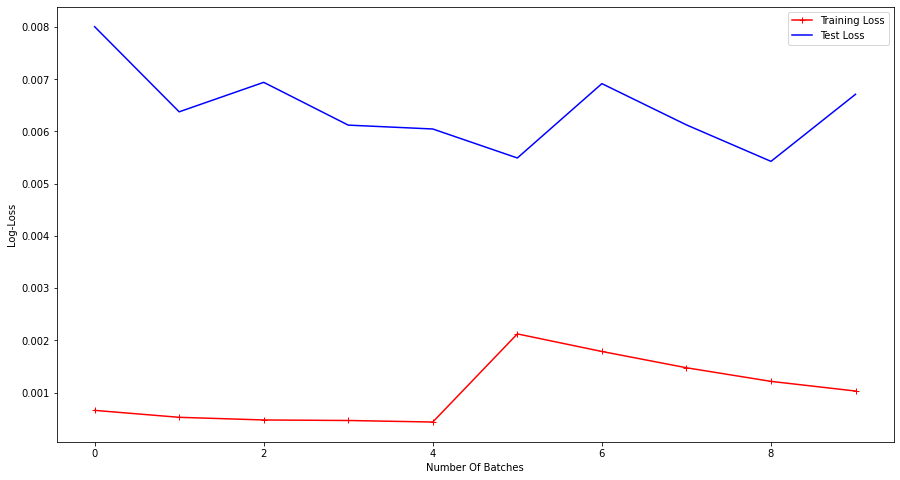

In [ ]:
plot_learning_cuve(rf, X_train_smote, y_train_smote)

## conclusion 

In [ ]:
res = {'Model':names_lst,
       #'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       #'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(res) 
performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy_Test,AUC_Test,PrecisionScore_Test,RecallScore_Test,F1Score_Test
6,RandomForestClassifier OverSampling,0.999602,0.904365,0.932203,0.808824,0.866142
5,RandomForestClassifier,0.999602,0.897024,0.947368,0.794118,0.864000
7,RandomForestClassifier Smote,0.999462,0.933659,0.808219,0.867647,0.836879
3,SVM,0.999368,0.827165,0.927083,0.654412,0.767241
0,logistic_regression nothing,0.999263,0.812430,0.876289,0.625000,0.729614
4,SVM OverSampling,0.985663,0.945102,0.092135,0.904412,0.167233
1,Logistic regression oversampling,0.973866,0.950206,0.053640,0.926471,0.101408
2,Logistic regression Smoti,0.972883,0.949714,0.051788,0.926471,0.098093


## Most five Features

In [ ]:
from sklearn.feature_selection import mutual_info_classif
#print(mutual_info_classif(x_train, y_train).argsort()[-5:][::-1])
mi = mutual_info_classif(X_train, y_train)
best_feature_five = mi.argsort()[-5:][::-1]
print(best_feature_five)

[13 16 11  9 10]
